#  <font color=red> Module_08_資料聚合</font>

## 拆開資料

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.197516,-0.135883
1,a,two,-1.319853,-0.467143
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814
4,a,one,-0.777363,0.599478


In [2]:
# 分組的 key 可以是序列
# 對應關係要注意
# 返回的是一個 GroupBy 的物件
grouped = df['data1'].groupby(df['key1'])  
grouped 

In [3]:
# 一個序列
# 分組的 key 會當索引標籤
grouped.mean() 

key1
a   -0.633233
b    0.306598
Name: data1, dtype: float64

---

In [4]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one    -0.289923
      two    -1.319853
b     one     1.656099
      two    -1.042903
Name: data1, dtype: float64

In [5]:
means.unstack()

key2,one,two
key1,,
a,-0.289923,-1.319853
b,1.656099,-1.042903


---

In [6]:
df

,key1,key2,data1,data2
0,a,one,0.197516,-0.135883
1,a,two,-1.319853,-0.467143
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814
4,a,one,-0.777363,0.599478


In [7]:
# 分組的 key 也可以是長度相符的陣列
# 分組的 key 會當索引標籤
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005   -1.319853
            2006    1.656099
Ohio        2005   -0.422694
            2006   -0.777363
Name: data1, dtype: float64

---

In [8]:
df

,key1,key2,data1,data2
0,a,one,0.197516,-0.135883
1,a,two,-1.319853,-0.467143
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814
4,a,one,-0.777363,0.599478


In [9]:
# 直接使用資料框
# 分組的 key 也可以是欄位名稱，此時前面的資料框就要跟欄位有關
# key2 的欄位因為不是數值型態，所以不會被包含在輸出結果中，但儘量不要這樣寫
df.groupby('key1').mean() 

,data1,data2
key1,,
a,-0.633233,-0.001183
b,0.306598,0.525272


In [10]:
# 這樣會是比較好的寫法
# 先 df.groupby('key1') 得到 GroupBy 的物件
# 再用 index 的方式表達要顯示那些欄位 df.groupby('key1')[['data1', 'data2']]
# 最後套用聚合方法
df.groupby('key1')[['data1', 'data2']].mean() 

,data1,data2
key1,,
a,-0.633233,-0.001183
b,0.306598,0.525272


---

In [11]:
df

,key1,key2,data1,data2
0,a,one,0.197516,-0.135883
1,a,two,-1.319853,-0.467143
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814
4,a,one,-0.777363,0.599478


In [12]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.289923  0.231797
     two  -1.319853 -0.467143
b    one   1.656099  1.209357
     two  -1.042903 -0.158814

In [13]:
# 返回序列
# 資料列的個數，是不是遺失值都要算
df.groupby(['key1', 'key2']).size() 

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

---

In [14]:
df

,key1,key2,data1,data2
0,a,one,0.197516,-0.135883
1,a,two,-1.319853,-0.467143
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814
4,a,one,-0.777363,0.599478


In [15]:
df.groupby('key1') # GroupBy 物件

In [16]:
# name 就是分到的每個組
# group 就是滿足這個組的所有資料 
for name, group in df.groupby('key1'): # GroupBy 物件支援疊代，會產生 2-tuple 的序列 
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.197516 -0.135883
1    a  two -1.319853 -0.467143
4    a  one -0.777363  0.599478
b
  key1 key2     data1     data2
2    b  one  1.656099  1.209357
3    b  two -1.042903 -0.158814


In [17]:
df

,key1,key2,data1,data2
0,a,one,0.197516,-0.135883
1,a,two,-1.319853,-0.467143
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814
4,a,one,-0.777363,0.599478


In [18]:
for name, group in df.groupby(['key1', 'key2']):
    print(name)
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.197516 -0.135883
4    a  one -0.777363  0.599478
('a', 'two')
  key1 key2     data1     data2
1    a  two -1.319853 -0.467143
('b', 'one')
  key1 key2     data1     data2
2    b  one  1.656099  1.209357
('b', 'two')
  key1 key2     data1     data2
3    b  two -1.042903 -0.158814


---

In [19]:
# 放進函式 list() 看會變成如何
# 裝成 (key, value) 的 tuple
list(df.groupby('key1'))

[('a',
    key1 key2     data1     data2
  0    a  one  0.197516 -0.135883
  1    a  two -1.319853 -0.467143
  4    a  one -0.777363  0.599478),
 ('b',
    key1 key2     data1     data2
  2    b  one  1.656099  1.209357
  3    b  two -1.042903 -0.158814)]

In [20]:
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one  0.197516 -0.135883
 1    a  two -1.319853 -0.467143
 4    a  one -0.777363  0.599478,
 'b':   key1 key2     data1     data2
 2    b  one  1.656099  1.209357
 3    b  two -1.042903 -0.158814}

In [21]:
# 可以用 key 找 value
pieces['b']

,key1,key2,data1,data2
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814


---

In [22]:
df

,key1,key2,data1,data2
0,a,one,0.197516,-0.135883
1,a,two,-1.319853,-0.467143
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814
4,a,one,-0.777363,0.599478


In [23]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [24]:
# 預設 axis = 0 對列操作，axis = 1 對行做操作
grouped = df.groupby(df.dtypes, axis = 1)

In [25]:
for name, group in grouped:
    print(name)
    print(group)

float64
      data1     data2
0  0.197516 -0.135883
1 -1.319853 -0.467143
2  1.656099  1.209357
3 -1.042903 -0.158814
4 -0.777363  0.599478
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


---

In [26]:
df

,key1,key2,data1,data2
0,a,one,0.197516,-0.135883
1,a,two,-1.319853,-0.467143
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814
4,a,one,-0.777363,0.599478


In [27]:
df.groupby('key1')['data1'].mean()

key1
a   -0.633233
b    0.306598
Name: data1, dtype: float64

In [28]:
# 注意上面那個跟這裡的寫法，兩個出來同一個效果
df['data1'].groupby(df['key1']).mean()

key1
a   -0.633233
b    0.306598
Name: data1, dtype: float64

In [29]:
# 兩個框框就變資料框了
df.groupby('key1')[['data1']].mean()

,data1
key1,
a,-0.633233
b,0.306598


In [30]:
df[['data1']].groupby(df['key1']).mean()

,data1
key1,
a,-0.633233
b,0.306598


---

In [31]:
df

,key1,key2,data1,data2
0,a,one,0.197516,-0.135883
1,a,two,-1.319853,-0.467143
2,b,one,1.656099,1.209357
3,b,two,-1.042903,-0.158814
4,a,one,-0.777363,0.599478


In [32]:
df.groupby(['key1', 'key2'])['data2'].mean() # 返回序列

key1  key2
a     one     0.231797
      two    -0.467143
b     one     1.209357
      two    -0.158814
Name: data2, dtype: float64

In [33]:
df.groupby(['key1', 'key2'])[['data2']].mean() # 返回資料框

data2
key1 key2          
a    one   0.231797
     two  -0.467143
b    one   1.209357
     two  -0.158814

---

In [34]:
# 分組的 key 也可以是字典或序列 
# 對應關係要注意
people = pd.DataFrame(np.random.randn(5, 5),
                      columns = ['a', 'b', 'c', 'd', 'e'],
                      index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people

,a,b,c,d,e
Joe,0.141750,1.006288,0.770249,-0.961438,1.420309
Steve,-0.924889,0.295338,0.487646,-0.136823,-1.414499
Wes,-0.830800,-1.527240,-1.026947,1.221320,0.089579
Jim,-0.819042,-1.139001,0.671299,0.485968,1.833587
Travis,0.830119,-0.183177,-0.996926,2.093616,0.921526


In [35]:
people.iloc[2:3, [1, 2]] = np.nan
people

,a,b,c,d,e
Joe,0.141750,1.006288,0.770249,-0.961438,1.420309
Steve,-0.924889,0.295338,0.487646,-0.136823,-1.414499
Wes,-0.830800,NaN,NaN,1.221320,0.089579
Jim,-0.819042,-1.139001,0.671299,0.485968,1.833587
Travis,0.830119,-0.183177,-0.996926,2.093616,0.921526


In [36]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [37]:
# 一個不會用到分組的 key 'f'，是不會有問題的
# 但如果你是寫成列表，長度不對就會產生例外
# 在操作時大部分的聚合方法都會忽略遺失值
by_column = people.groupby(mapping, axis = 1) 
by_column.mean()

,blue,red
Joe,-0.095594,0.856116
Steve,0.175411,-0.681350
Wes,1.221320,-0.370610
Jim,0.578633,-0.041485
Travis,0.548345,0.522823


---

In [38]:
people

,a,b,c,d,e
Joe,0.141750,1.006288,0.770249,-0.961438,1.420309
Steve,-0.924889,0.295338,0.487646,-0.136823,-1.414499
Wes,-0.830800,NaN,NaN,1.221320,0.089579
Jim,-0.819042,-1.139001,0.671299,0.485968,1.833587
Travis,0.830119,-0.183177,-0.996926,2.093616,0.921526


In [39]:
map_Series = pd.Series(mapping)
map_Series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [40]:
people.groupby(map_Series, axis = 1).count() # 這裡的聚合方法 .count() 遺失值不會算入

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


---

In [41]:
people

,a,b,c,d,e
Joe,0.141750,1.006288,0.770249,-0.961438,1.420309
Steve,-0.924889,0.295338,0.487646,-0.136823,-1.414499
Wes,-0.830800,NaN,NaN,1.221320,0.089579
Jim,-0.819042,-1.139001,0.671299,0.485968,1.833587
Travis,0.830119,-0.183177,-0.996926,2.093616,0.921526


In [42]:
people.groupby(len)

In [43]:
# 分組的 key 也可以是函式
# 會作用在每個索引標籤上
# 若加入參數 axis = 1 ，就會作用在欄位上
people.groupby(len).sum()

,a,b,c,d,e
3,-1.508092,-0.132713,1.441549,0.745850,3.343476
5,-0.924889,0.295338,0.487646,-0.136823,-1.414499
6,0.830119,-0.183177,-0.996926,2.093616,0.921526


In [44]:
people.groupby(len, axis = 1).sum()

,1
Joe,2.377159
Steve,-1.693228
Wes,0.480100
Jim,1.032810
Travis,2.665159


In [45]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.830800  1.006288  0.770249 -0.961438  0.089579
  two -0.819042 -1.139001  0.671299  0.485968  1.833587
5 one -0.924889  0.295338  0.487646 -0.136823 -1.414499
6 two  0.830119 -0.183177 -0.996926  2.093616  0.921526

---

In [46]:
# 也可以對索引標籤做分組
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names = ['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns = columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.880278 -0.492123 -0.775784 -1.133861 -0.325939
1     -1.624358 -1.684600 -1.661991 -2.234306  0.021922
2     -0.022305 -0.710777 -0.944565 -0.423991  0.623058
3      0.397215  0.053313  0.350833  0.053102  0.333459

In [47]:
hier_df.groupby(level = 'cty', axis = 1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [48]:
hier_df.groupby(level = 0).count()

cty   US       JP   
tenor  1  3  5  1  3
0      1  1  1  1  1
1      1  1  1  1  1
2      1  1  1  1  1
3      1  1  1  1  1

---

In [49]:
sensor_data = pd.read_csv('./mod08/sensors.csv')
sensor_data

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4
5,1,accel,X,0.9
6,2,accel,Z,0.2
7,2,accel,Y,0.3
8,2,accel,X,0.8
9,3,accel,Z,0.3


In [50]:
group_by_sensor = sensor_data.groupby('sensor')
group_by_sensor # 返回一個 GroupBy 物件

In [51]:
# 如果想看分組數目可用 ngroups 屬性
group_by_sensor.ngroups

2

In [52]:
group_by_sensor.groups

{'accel': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'orientation': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}

---

In [53]:
for name, group in group_by_sensor:
    print(name)
    print(group)

accel
    interval sensor axis  reading
0          0  accel    Z      0.0
1          0  accel    Y      0.5
2          0  accel    X      1.0
3          1  accel    Z      0.1
4          1  accel    Y      0.4
5          1  accel    X      0.9
6          2  accel    Z      0.2
7          2  accel    Y      0.3
8          2  accel    X      0.8
9          3  accel    Z      0.3
10         3  accel    Y      0.2
11         3  accel    X      0.7
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2
17         1  orientation    X      0.1
18         2  orientation    Z      0.0
19         2  orientation    Y      0.3
20         2  orientation    X      0.2
21         3  orientation    Z      0.0
22         3  orientation    Y      0.4
23         3  orientation    X      0.3


In [54]:
# 可以定義成函式，這樣程式碼可以重複使用，注意裡面的參數是要帶入 GroupBy 物件
def print_groups(group_object):
    for name, group in group_object:
        print(name)
        print(group[:5])

---

In [55]:
print_groups(group_by_sensor)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [56]:
# 返回序列
# 資料列的個數，是不是遺失值都要算
group_by_sensor.size()

sensor
accel          12
orientation    12
dtype: int64

In [57]:
group_by_sensor.count() # 對列作操作數個數，排除遺失值

,interval,axis,reading
sensor,,,
accel,12,12,12
orientation,12,12,12


In [58]:
group_by_sensor.get_group('accel') # 可以用 GroupBy 的 .get_group() 方法提取特定分組

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4
5,1,accel,X,0.9
6,2,accel,Z,0.2
7,2,accel,Y,0.3
8,2,accel,X,0.8
9,3,accel,Z,0.3


In [59]:
group_by_sensor.head(3) # GroupBy 物件的方法，顯示每個分組的前三筆資料

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
12,0,orientation,Z,0.0
13,0,orientation,Y,0.1
14,0,orientation,X,0.0


In [60]:
group_by_sensor.tail(3) # GroupBy 物件的方法，顯示每個分組的後三筆資料

,interval,sensor,axis,reading
9,3,accel,Z,0.3
10,3,accel,Y,0.2
11,3,accel,X,0.7
21,3,orientation,Z,0.0
22,3,orientation,Y,0.4
23,3,orientation,X,0.3


In [61]:
group_by_sensor.nth(1) # GroupBy 物件的方法，傳回第二項

,interval,axis,reading
sensor,,,
accel,0,Y,0.5
orientation,0,Y,0.1


In [62]:
# GroupBy 物件的方法，對每一組做敘述性統計量
# axis 不是數值資料，所以沒有被顯示
group_by_sensor.describe() 

interval                                           reading  \
               count mean       std  min   25%  50%   75%  max   count   
sensor                                                                   
accel           12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   
orientation     12.0  1.5  1.167748  0.0  0.75  1.5  2.25  3.0    12.0   

                                                             
                 mean       std  min  25%   50%    75%  max  
sensor                                                       
accel        0.450000  0.328910  0.0  0.2  0.35  0.725  1.0  
orientation  0.133333  0.143548  0.0  0.0  0.10  0.225  0.4

---

In [63]:
sensor_data

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4
5,1,accel,X,0.9
6,2,accel,Z,0.2
7,2,accel,Y,0.3
8,2,accel,X,0.8
9,3,accel,Z,0.3


In [64]:
mcg = sensor_data.groupby(['sensor', 'axis']) # 因為指定了好幾行，所以名字變成了 tuple
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

---

In [65]:
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
            X            1      0.9
            Z            2      0.2
            Y            2      0.3
            X            2      0.8
            Z            3      0.3
            Y            3      0.2
            X            3      0.7
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2
            X            1      0.1
            Z            2      0.0
            Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

In [66]:
print_groups(mi.groupby(level = 0)) # 對索引標籤進行分組

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2


In [67]:
print_groups(mi.groupby(level = ['sensor', 'axis']))

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

## 套用聚合函數

In [68]:
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9])
s

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [69]:
# Return value at the given quantile.
# 找出分位數
s.quantile(0.5)

5.0

In [70]:
s.quantile([0.25, 0.5, 0.75])

0.25    3.0
0.50    5.0
0.75    7.0
dtype: float64

---

In [71]:
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [72]:
s.quantile(0.5)

2.5

In [73]:
# 第一步看位置，四個數共三格
# 在 1 + 0.25*3 = 1.75 的位置 
# 第 1 的數是 1 ，第 2 的數是 2，回推第 1.75位置的數是多少
s.quantile([0.25, 0.5, 0.75, 0.9])

0.25    1.75
0.50    2.50
0.75    3.25
0.90    3.70
dtype: float64

---

In [74]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.516252,-0.007550
1,a,two,1.064497,0.939362
2,b,one,0.228519,0.658103
3,b,two,0.981954,-1.491158
4,a,one,0.192990,1.048522


In [75]:
# 如果沒寫 [['data1', 'data2']]，會出現警告，因為非數值的 key2 沒辦法算分位數
grouped = df.groupby('key1')[['data1', 'data2']]
grouped.quantile(0.5)

,data1,data2
key1,,
a,0.192990,0.939362
b,0.605236,-0.416528


In [76]:
grouped.mean()

,data1,data2
key1,,
a,-0.086255,0.660111
b,0.605236,-0.416528


In [77]:
# 另一種寫法
# 用 .agg() 方法，傳入聚合的函數
grouped.agg(np.mean)

,data1,data2
key1,,
a,-0.086255,0.660111
b,0.605236,-0.416528


In [78]:
# 也可以傳入字串，但有些沒辦法被辨識出
grouped.agg('mean')

,data1,data2
key1,,
a,-0.086255,0.660111
b,0.605236,-0.416528


---

In [79]:
print_groups(grouped)

a
  key1 key2     data1     data2
0    a  one -1.516252 -0.007550
1    a  two  1.064497  0.939362
4    a  one  0.192990  1.048522
b
  key1 key2     data1     data2
2    b  one  0.228519  0.658103
3    b  two  0.981954 -1.491158


In [80]:
# 注意 arr 傳入的會是序列
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [81]:
# 傳入自定義的函數
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.580749,1.056072
b,0.753435,2.149260


In [82]:
def max_Series(arr):
    return max(arr.map(abs))

In [83]:
# 傳入自定義的函數
grouped.agg(max_Series)

,data1,data2
key1,,
a,1.516252,1.048522
b,0.981954,1.491158


---

In [84]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.086255  1.312840 -1.516252 -0.661631  0.192990  0.628743   
b      2.0  0.605236  0.532759  0.228519  0.416878  0.605236  0.793595   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.064497   3.0  0.660111  0.580782 -0.007550  0.465906  0.939362   
b     0.981954   2.0 -0.416528  1.519756 -1.491158 -0.953843 -0.416528   

                          
           75%       max  
key1                      
a     0.993942  1.048522  
b     0.120788  0.658103

---

In [85]:
tips = pd.read_csv('./mod08/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [86]:
# 加入小費佔總結帳金額的比例
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [87]:
grouped = tips.groupby(['day', 'smoker'])
print_groups(grouped)

('Fri', 'No')
     total_bill   tip smoker  day    time  size   tip_pct
91        22.49  3.50     No  Fri  Dinner     2  0.155625
94        22.75  3.25     No  Fri  Dinner     2  0.142857
99        12.46  1.50     No  Fri  Dinner     2  0.120385
223       15.98  3.00     No  Fri   Lunch     3  0.187735
('Fri', 'Yes')
    total_bill   tip smoker  day    time  size   tip_pct
90       28.97  3.00    Yes  Fri  Dinner     2  0.103555
92        5.75  1.00    Yes  Fri  Dinner     2  0.173913
93       16.32  4.30    Yes  Fri  Dinner     2  0.263480
95       40.17  4.73    Yes  Fri  Dinner     4  0.117750
96       27.28  4.00    Yes  Fri  Dinner     2  0.146628
('Sat', 'No')
    total_bill   tip smoker  day    time  size   tip_pct
19       20.65  3.35     No  Sat  Dinner     3  0.162228
20       17.92  4.08     No  Sat  Dinner     2  0.227679
21       20.29  2.75     No  Sat  Dinner     2  0.135535
22       15.77  2.23     No  Sat  Dinner     2  0.141408
23       39.42  7.58     No  Sat  Dinner

In [88]:
# 關注欄位 tip_pct
grouped_pct = grouped['tip_pct']
print_groups(grouped_pct)

('Fri', 'No')
91     0.155625
94     0.142857
99     0.120385
223    0.187735
Name: tip_pct, dtype: float64
('Fri', 'Yes')
90    0.103555
92    0.173913
93    0.263480
95    0.117750
96    0.146628
Name: tip_pct, dtype: float64
('Sat', 'No')
19    0.162228
20    0.227679
21    0.135535
22    0.141408
23    0.192288
Name: tip_pct, dtype: float64
('Sat', 'Yes')
56    0.078927
58    0.156584
60    0.158206
61    0.144823
62    0.179673
Name: tip_pct, dtype: float64
('Sun', 'No')
0    0.059447
1    0.160542
2    0.166587
3    0.139780
4    0.146808
Name: tip_pct, dtype: float64
('Sun', 'Yes')
164    0.171331
172    0.710345
173    0.099843
174    0.237812
175    0.094529
Name: tip_pct, dtype: float64
('Thur', 'No')
77    0.147059
78    0.131810
79    0.156738
81    0.204082
82    0.181728
Name: tip_pct, dtype: float64
('Thur', 'Yes')
80     0.154321
83     0.152999
138    0.125000
191    0.211509
192    0.090014
Name: tip_pct, dtype: float64


In [89]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [90]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [91]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)]) # 傳入 (name, function) 的 tuple

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

---

In [92]:
print_groups(grouped)

('Fri', 'No')
     total_bill   tip smoker  day    time  size   tip_pct
91        22.49  3.50     No  Fri  Dinner     2  0.155625
94        22.75  3.25     No  Fri  Dinner     2  0.142857
99        12.46  1.50     No  Fri  Dinner     2  0.120385
223       15.98  3.00     No  Fri   Lunch     3  0.187735
('Fri', 'Yes')
    total_bill   tip smoker  day    time  size   tip_pct
90       28.97  3.00    Yes  Fri  Dinner     2  0.103555
92        5.75  1.00    Yes  Fri  Dinner     2  0.173913
93       16.32  4.30    Yes  Fri  Dinner     2  0.263480
95       40.17  4.73    Yes  Fri  Dinner     4  0.117750
96       27.28  4.00    Yes  Fri  Dinner     2  0.146628
('Sat', 'No')
    total_bill   tip smoker  day    time  size   tip_pct
19       20.65  3.35     No  Sat  Dinner     3  0.162228
20       17.92  4.08     No  Sat  Dinner     2  0.227679
21       20.29  2.75     No  Sat  Dinner     2  0.135535
22       15.77  2.23     No  Sat  Dinner     2  0.141408
23       39.42  7.58     No  Sat  Dinner

In [93]:
result = grouped[['tip_pct', 'total_bill']].agg(['count', 'mean', 'max'])
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [94]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [95]:
# Durchschnitt 是德語的平均，Abweichung 是德語的變異數
grouped[['tip_pct', 'total_bill']].agg([('Durchschnitt', 'mean'), ('Abweichung', np.var)])

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

---

In [96]:
print_groups(grouped)

('Fri', 'No')
     total_bill   tip smoker  day    time  size   tip_pct
91        22.49  3.50     No  Fri  Dinner     2  0.155625
94        22.75  3.25     No  Fri  Dinner     2  0.142857
99        12.46  1.50     No  Fri  Dinner     2  0.120385
223       15.98  3.00     No  Fri   Lunch     3  0.187735
('Fri', 'Yes')
    total_bill   tip smoker  day    time  size   tip_pct
90       28.97  3.00    Yes  Fri  Dinner     2  0.103555
92        5.75  1.00    Yes  Fri  Dinner     2  0.173913
93       16.32  4.30    Yes  Fri  Dinner     2  0.263480
95       40.17  4.73    Yes  Fri  Dinner     4  0.117750
96       27.28  4.00    Yes  Fri  Dinner     2  0.146628
('Sat', 'No')
    total_bill   tip smoker  day    time  size   tip_pct
19       20.65  3.35     No  Sat  Dinner     3  0.162228
20       17.92  4.08     No  Sat  Dinner     2  0.227679
21       20.29  2.75     No  Sat  Dinner     2  0.135535
22       15.77  2.23     No  Sat  Dinner     2  0.141408
23       39.42  7.58     No  Sat  Dinner

In [97]:
grouped.agg({'tip': np.max, 'size': 'sum'})  # 針對不同行套用不同的函式

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [98]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

---

In [99]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [100]:
# 如果加入參數 as_index = False，day 與 smoker 就不會變成索引標籤
tips.groupby(['day', 'smoker'], as_index = False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


---

In [101]:
sensor_data = pd.read_csv('./mod08/sensors.csv')
sensor_data[:5]

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4


In [102]:
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi[:5]

interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4

In [103]:
sensor_axis_grouping = mi.groupby(level = ['sensor', 'axis'])
print_groups(sensor_axis_grouping)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

In [104]:
sensor_axis_grouping.agg(np.mean)

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

---

In [105]:
sensor_data

,interval,sensor,axis,reading
0,0,accel,Z,0.0
1,0,accel,Y,0.5
2,0,accel,X,1.0
3,1,accel,Z,0.1
4,1,accel,Y,0.4
5,1,accel,X,0.9
6,2,accel,Z,0.2
7,2,accel,Y,0.3
8,2,accel,X,0.8
9,3,accel,Z,0.3


In [106]:
sensor_data.groupby(['sensor', 'axis']).agg(np.mean) # 預設 as_index = True

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [107]:
sensor_data.groupby(['sensor', 'axis'], as_index = False).agg(np.mean) 

,sensor,axis,interval,reading
0,accel,X,1.5,0.85
1,accel,Y,1.5,0.35
2,accel,Z,1.5,0.15
3,orientation,X,1.5,0.15
4,orientation,Y,1.5,0.25
5,orientation,Z,1.5,0.00


---

In [108]:
print_groups(sensor_axis_grouping)

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

In [109]:
sensor_axis_grouping.mean()

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [110]:
sensor_axis_grouping.agg(np.mean)

interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [111]:
sensor_axis_grouping.agg([np.sum, np.std])

interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [112]:
# 針對不同行套用不同的函式
# len 在算序列的長度
sensor_axis_grouping.agg({'interval': len, 'reading': np.mean}) 

interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [113]:
sensor_axis_grouping['reading'].mean() # 返回序列

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

In [114]:
sensor_axis_grouping[['reading']].mean() # 返回資料框

reading
sensor      axis         
accel       X        0.85
            Y        0.35
            Z        0.15
orientation X        0.15
            Y        0.25
            Z        0.00

## 轉換分組資料

In [115]:
df = pd.DataFrame({'A': 'a b a'.split(),
                   'B': [1, 2, 3],
                   'C': [4, 6, 5]})
df

,A,B,C
0,a,1,4
1,b,2,6
2,a,3,5


In [116]:
g = df.groupby('A')

In [117]:
print_groups(g)

a
   A  B  C
0  a  1  4
2  a  3  5
b
   A  B  C
1  b  2  6


---

In [118]:
g[['B', 'C']].mean()

,B,C
A,,
a,2.0,4.5
b,2.0,6.0


In [119]:
g[['B', 'C']].apply(lambda x: x + 2) 

,B,C
0,3,6
1,4,8
2,5,7


In [120]:
g[['B', 'C']].apply(lambda x: x / x.sum())

,B,C
0,0.25,0.444444
1,1.00,1.000000
2,0.75,0.555556


In [121]:
print_groups(g)

a
   A  B  C
0  a  1  4
2  a  3  5
b
   A  B  C
1  b  2  6


In [122]:
g[['B', 'C']].apply(lambda x: x.max() - x.min())

,B,C
A,,
a,2,1
b,0,0


In [123]:
g.apply(lambda x: x.C.max())

A
a    5
b    6
dtype: int64

---

In [124]:
tips = pd.read_csv('./mod08/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [125]:
def top(df, n = 5, column = 'tip_pct'):
    return df.sort_values(by = column)[-n:]

top(tips, n = 6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


---

In [126]:
print_groups(tips.groupby('smoker'))

No
   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4  0.146808
Yes
    total_bill   tip smoker  day    time  size   tip_pct
56       38.01  3.00    Yes  Sat  Dinner     4  0.078927
58       11.24  1.76    Yes  Sat  Dinner     2  0.156584
60       20.29  3.21    Yes  Sat  Dinner     2  0.158206
61       13.81  2.00    Yes  Sat  Dinner     2  0.144823
62       11.02  1.98    Yes  Sat  Dinner     2  0.179673


In [127]:
# 這裡有聚合的效果，每看到一個群組就會呼叫 top 函式
# 最後每個結果會用類似 pd.concat() 的方式串連起來，用分組名稱標示每塊資料，所以最後出來的結果帶有階層式索引
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

---

In [128]:
print_groups(tips.groupby(['smoker', 'day']))

('No', 'Fri')
     total_bill   tip smoker  day    time  size   tip_pct
91        22.49  3.50     No  Fri  Dinner     2  0.155625
94        22.75  3.25     No  Fri  Dinner     2  0.142857
99        12.46  1.50     No  Fri  Dinner     2  0.120385
223       15.98  3.00     No  Fri   Lunch     3  0.187735
('No', 'Sat')
    total_bill   tip smoker  day    time  size   tip_pct
19       20.65  3.35     No  Sat  Dinner     3  0.162228
20       17.92  4.08     No  Sat  Dinner     2  0.227679
21       20.29  2.75     No  Sat  Dinner     2  0.135535
22       15.77  2.23     No  Sat  Dinner     2  0.141408
23       39.42  7.58     No  Sat  Dinner     4  0.192288
('No', 'Sun')
   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4 

In [129]:
# 有其他參數或關鍵字要傳的話，將他們寫在函式名稱後面即可
tips.groupby(['smoker', 'day']).apply(top, n = 1, column = 'total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

---

In [130]:
print_groups(tips.groupby('smoker'))

No
   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4  0.146808
Yes
    total_bill   tip smoker  day    time  size   tip_pct
56       38.01  3.00    Yes  Sat  Dinner     4  0.078927
58       11.24  1.76    Yes  Sat  Dinner     2  0.156584
60       20.29  3.21    Yes  Sat  Dinner     2  0.158206
61       13.81  2.00    Yes  Sat  Dinner     2  0.144823
62       11.02  1.98    Yes  Sat  Dinner     2  0.179673


In [131]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [132]:
result.stack()

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64

---

In [133]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [134]:
print_groups(tips.groupby('smoker')['tip_pct'])

No
0    0.059447
1    0.160542
2    0.166587
3    0.139780
4    0.146808
Name: tip_pct, dtype: float64
Yes
56    0.078927
58    0.156584
60    0.158206
61    0.144823
62    0.179673
Name: tip_pct, dtype: float64


In [135]:
tips.groupby('smoker')['tip_pct'].apply(lambda x: x.describe())

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
Name: tip_pct, dtype: float64

---

In [136]:
print_groups(tips.groupby('smoker'))

No
   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4  0.146808
Yes
    total_bill   tip smoker  day    time  size   tip_pct
56       38.01  3.00    Yes  Sat  Dinner     4  0.078927
58       11.24  1.76    Yes  Sat  Dinner     2  0.156584
60       20.29  3.21    Yes  Sat  Dinner     2  0.158206
61       13.81  2.00    Yes  Sat  Dinner     2  0.144823
62       11.02  1.98    Yes  Sat  Dinner     2  0.179673


In [137]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [138]:
# 可以比較一下 as_index = False 與 group_keys = False 的差別
tips.groupby('smoker', group_keys = False).apply(top) # 關閉分組索引製作功能

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


---

In [139]:
# 分位數與購物籃分析
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
frame

,data1,data2
0,0.331667,0.525446
1,-0.361247,-0.045942
2,-0.316728,-0.437224
3,-1.365732,0.454566
4,1.852655,-0.382485
...,...,...
995,0.634795,-1.592522
996,-0.075692,1.991959
997,-0.709445,1.310193
998,-0.956334,-0.436384


In [140]:
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

0     (-0.38, 1.169]
1     (-0.38, 1.169]
2     (-0.38, 1.169]
3    (-1.928, -0.38]
4     (1.169, 2.717]
5     (-0.38, 1.169]
6     (-0.38, 1.169]
7     (-0.38, 1.169]
8     (-0.38, 1.169]
9    (-1.928, -0.38]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(-3.482, -1.928] < (-1.928, -0.38] < (-0.38, 1.169] < (1.169, 2.717]]

In [141]:
grouped = frame.data2.groupby(quartiles)
print_groups(grouped)

(-3.482, -1.928]
34    -0.580901
78     0.808812
129    0.823361
130    0.298862
154   -0.667408
Name: data2, dtype: float64
(-1.928, -0.38]
3     0.454566
9     0.067149
12   -0.534145
14    1.068866
15    0.489895
Name: data2, dtype: float64
(-0.38, 1.169]
0    0.525446
1   -0.045942
2   -0.437224
5    2.435294
6    0.179652
Name: data2, dtype: float64
(1.169, 2.717]
4    -0.382485
22    0.129970
32    0.297075
46    1.253457
65    0.806815
Name: data2, dtype: float64


In [142]:
grouped.max()

data1
(-3.482, -1.928]    2.082222
(-1.928, -0.38]     2.873041
(-0.38, 1.169]      2.814860
(1.169, 2.717]      2.586723
Name: data2, dtype: float64

In [143]:
def get_stats(group):
    return  pd.Series({'min': group.min(), 
                       'max': group.max(),
                       'count': group.count(),
                       'mean': group.mean()})

grouped.apply(get_stats)

data1                  
(-3.482, -1.928]  min       -1.861959
                  max        2.082222
                  count     22.000000
                  mean       0.302174
(-1.928, -0.38]   min       -2.971009
                  max        2.873041
                  count    322.000000
                  mean      -0.023564
(-0.38, 1.169]    min       -2.524544
                  max        2.814860
                  count    530.000000
                  mean       0.036345
(1.169, 2.717]    min       -2.475262
                  max        2.586723
                  count    126.000000
                  mean       0.094650
Name: data2, dtype: float64

In [144]:
# 寫成字典會得到跟剛剛一樣的效果，出來的字典型態會被轉換成序列在串連起來
def get_stats(group):
    return  {'min': group.min(), 
            'max': group.max(),
            'count': group.count(),
            'mean': group.mean()}

grouped.apply(get_stats)

data1                  
(-3.482, -1.928]  min       -1.861959
                  max        2.082222
                  count     22.000000
                  mean       0.302174
(-1.928, -0.38]   min       -2.971009
                  max        2.873041
                  count    322.000000
                  mean      -0.023564
(-0.38, 1.169]    min       -2.524544
                  max        2.814860
                  count    530.000000
                  mean       0.036345
(1.169, 2.717]    min       -2.475262
                  max        2.586723
                  count    126.000000
                  mean       0.094650
Name: data2, dtype: float64

In [145]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.482, -1.928]",-1.861959,2.082222,22.0,0.302174
"(-1.928, -0.38]",-2.971009,2.873041,322.0,-0.023564
"(-0.38, 1.169]",-2.524544,2.814860,530.0,0.036345
"(1.169, 2.717]",-2.475262,2.586723,126.0,0.094650


---

In [146]:
frame

,data1,data2
0,0.331667,0.525446
1,-0.361247,-0.045942
2,-0.316728,-0.437224
3,-1.365732,0.454566
4,1.852655,-0.382485
...,...,...
995,0.634795,-1.592522
996,-0.075692,1.991959
997,-0.709445,1.310193
998,-0.956334,-0.436384


In [147]:
 pd.qcut(frame.data1, 10)

0        (0.253, 0.525]
1       (-0.499, -0.25]
2       (-0.499, -0.25]
3      (-3.477, -1.213]
4        (1.369, 2.717]
             ...       
995      (0.525, 0.826]
996     (-0.25, -0.017]
997    (-0.808, -0.499]
998    (-1.213, -0.808]
999      (0.253, 0.525]
Name: data1, Length: 1000, dtype: category
Categories (10, interval[float64, right]): [(-3.477, -1.213] < (-1.213, -0.808] < (-0.808, -0.499] < (-0.499, -0.25] ... (0.253, 0.525] < (0.525, 0.826] < (0.826, 1.369] < (1.369, 2.717]]

In [148]:
# 如果加入參數 labels = False，會把桶子名改成數值，從 0 開始算起。
grouping = pd.qcut(frame.data1, 10, labels = False)
grouping

0      6
1      3
2      3
3      0
4      9
      ..
995    7
996    4
997    2
998    1
999    6
Name: data1, Length: 1000, dtype: int64

In [149]:
grouped = frame.data2.groupby(grouping)
print_groups(grouped)

0
3     0.454566
9     0.067149
34   -0.580901
37   -2.971009
45   -1.183040
Name: data2, dtype: float64
1
14    1.068866
15    0.489895
20    0.430584
23   -0.107525
28    0.482595
Name: data2, dtype: float64
2
12   -0.534145
18   -0.547523
39   -0.386786
41   -0.441471
44    0.996573
Name: data2, dtype: float64
3
1    -0.045942
2    -0.437224
40    0.943583
47   -0.418949
50    1.240155
Name: data2, dtype: float64
4
6     0.179652
7     2.049306
35    0.273844
38   -0.951232
43    0.969485
Name: data2, dtype: float64
5
5     2.435294
8    -1.497656
11   -0.729259
13    1.334604
31   -0.300839
Name: data2, dtype: float64
6
0     0.525446
16    0.913099
19   -0.051554
21   -1.032617
25    0.205875
Name: data2, dtype: float64
7
10    0.257430
17   -1.629316
26    1.627254
63    1.200478
72    0.644579
Name: data2, dtype: float64
8
24   -0.522309
48   -0.577321
76    0.433482
88    1.333061
92   -0.602205
Name: data2, dtype: float64
9
4    -0.382485
22    0.129970
32    0.297075
46    1.

In [150]:
grouped.apply(get_stats)

data1       
0      min       -2.971009
       max        2.302723
       count    100.000000
       mean       0.206198
1      min       -2.234595
       max        2.194283
       count    100.000000
       mean      -0.116959
2      min       -2.246092
       max        2.127140
       count    100.000000
       mean      -0.133897
3      min       -2.328027
       max        2.873041
       count    100.000000
       mean      -0.008520
4      min       -2.524544
       max        2.488572
       count    100.000000
       mean       0.077686
5      min       -2.304836
       max        2.435294
       count    100.000000
       mean       0.034989
6      min       -2.427147
       max        2.686280
       count    100.000000
       mean       0.031249
7      min       -2.094602
       max        2.428717
       count    100.000000
       mean      -0.067561
8      min       -2.236403
       max        2.814860
       count    100.000000
       mean       0.167174
9      min     

In [151]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.971009,2.302723,100.0,0.206198
1,-2.234595,2.194283,100.0,-0.116959
2,-2.246092,2.127140,100.0,-0.133897
3,-2.328027,2.873041,100.0,-0.008520
4,-2.524544,2.488572,100.0,0.077686
5,-2.304836,2.435294,100.0,0.034989
6,-2.427147,2.686280,100.0,0.031249
7,-2.094602,2.428717,100.0,-0.067561
8,-2.236403,2.814860,100.0,0.167174


---

In [152]:
df = pd.DataFrame({'key': ['a', 'b', 'c']*4,
                   'value': np.arange(12.)})
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [153]:
g = df.groupby('key')['value']

In [154]:
print_groups(g)

a
0    0.0
3    3.0
6    6.0
9    9.0
Name: value, dtype: float64
b
1      1.0
4      4.0
7      7.0
10    10.0
Name: value, dtype: float64
c
2      2.0
5      5.0
8      8.0
11    11.0
Name: value, dtype: float64


In [155]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [156]:
g.apply(lambda x: x.mean())

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [157]:
g.apply(lambda x: np.mean(x))

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

---

In [158]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [159]:
g = df.groupby('key')['value']
print_groups(g)

a
0    0.0
3    3.0
6    6.0
9    9.0
Name: value, dtype: float64
b
1      1.0
4      4.0
7      7.0
10    10.0
Name: value, dtype: float64
c
2      2.0
5      5.0
8      8.0
11    11.0
Name: value, dtype: float64


In [160]:
# 注意 GroupBy 物件的 .transform() 方法的效果，與 .apply() 的差別
# 可以產生一個常數，用於廣播到所有分組，把值帶回原始的資料框
# 可以產生跟輸入分組一樣大小的一個資料，再把值帶回原始的資料框
# 它的輸入不能是 mutate 類型
g.transform(lambda x: x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [161]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

---

In [162]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [163]:
g = df.groupby('key')['value']
print_groups(g)

a
0    0.0
3    3.0
6    6.0
9    9.0
Name: value, dtype: float64
b
1      1.0
4      4.0
7      7.0
10    10.0
Name: value, dtype: float64
c
2      2.0
5      5.0
8      8.0
11    11.0
Name: value, dtype: float64


In [164]:
# 這時跟用 .apply() 方法同效果
g.transform(lambda x: x*2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [165]:
g.apply(lambda x: x*2)

0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [166]:
g.transform(lambda x: x.rank(ascending = False))

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

---

In [167]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [168]:
g = df.groupby('key')['value']
print_groups(g)

a
0    0.0
3    3.0
6    6.0
9    9.0
Name: value, dtype: float64
b
1      1.0
4      4.0
7      7.0
10    10.0
Name: value, dtype: float64
c
2      2.0
5      5.0
8      8.0
11    11.0
Name: value, dtype: float64


In [169]:
def normailze(x):
    return (x - x.mean())/x.std()

In [170]:
# 沒有聚合效果，所以跟 .apply() 產生同一的結果
g.transform(normailze)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [171]:
g.apply(normailze)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

---

In [172]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [173]:
g = df.groupby('key')['value']
print_groups(g)

a
0    0.0
3    3.0
6    6.0
9    9.0
Name: value, dtype: float64
b
1      1.0
4      4.0
7      7.0
10    10.0
Name: value, dtype: float64
c
2      2.0
5      5.0
8      8.0
11    11.0
Name: value, dtype: float64


In [174]:
g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [175]:
g.transform('std')

0     3.872983
1     3.872983
2     3.872983
3     3.872983
4     3.872983
5     3.872983
6     3.872983
7     3.872983
8     3.872983
9     3.872983
10    3.872983
11    3.872983
Name: value, dtype: float64

In [176]:
#　這種方法叫做未包裝分組 (unwrapped)
(df['value'] - g.transform('mean'))/g.transform('std')

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

---

In [177]:
transform_data = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],
                                'Values': [0, 1, 2, 3, 4],
                                'Values2': [5, 6, 7, 8, 9],
                                'Other': ['foo', 'bar', 'baz', 'fiz', 'buz']}, index = list('VWXYZ'))
transform_data

,Label,Values,Values2,Other
V,A,0,5,foo
W,C,1,6,bar
X,B,2,7,baz
Y,A,3,8,fiz
Z,C,4,9,buz


In [178]:
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

A
  Label  Values  Values2 Other
V     A       0        5   foo
Y     A       3        8   fiz
B
  Label  Values  Values2 Other
X     B       2        7   baz
C
  Label  Values  Values2 Other
W     C       1        6   bar
Z     C       4        9   buz


In [179]:
grouped_by_label[['Values', 'Values2']].transform(lambda x: x + 10)

,Values,Values2
V,10,15
W,11,16
X,12,17
Y,13,18
Z,14,19


---

In [180]:
df = pd.DataFrame({ 'Label': list("ABABAB"),
                    'Values': [10, 20, 11, np.nan, 12, 22]})
df

,Label,Values
0,A,10.0
1,B,20.0
2,A,11.0
3,B,NaN
4,A,12.0
5,B,22.0


In [181]:
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [182]:
grouped.mean()

,Values
Label,
A,11.0
B,21.0


In [183]:
# 遺失值按照分組的平均值來填
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

,Values
0,10.0
1,20.0
2,11.0
3,21.0
4,12.0
5,22.0


---

In [184]:
# 從平均值 0.5，標準差 2 的常態分佈選出 365*3 個數
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3), 
                 index = pd.date_range('2013-01-01', periods = 365*3))
data

2013-01-01    1.438225
2013-01-02   -0.065727
2013-01-03   -2.518117
2013-01-04   -1.771265
2013-01-05    2.924224
                ...   
2015-12-27   -0.276625
2015-12-28    0.259735
2015-12-29    1.404361
2015-12-30   -0.106687
2015-12-31    1.796756
Freq: D, Length: 1095, dtype: float64

In [185]:
# window: 窗要多大
# min_periods: 窗裡面最少有幾個值就算出結果
periods = 100
data.rolling(window = periods, min_periods = periods).mean()

2013-01-01         NaN
2013-01-02         NaN
2013-01-03         NaN
2013-01-04         NaN
2013-01-05         NaN
                ...   
2015-12-27    0.811402
2015-12-28    0.835961
2015-12-29    0.850998
2015-12-30    0.842293
2015-12-31    0.848419
Freq: D, Length: 1095, dtype: float64

In [186]:
periods = 100
rolling = data.rolling(window = periods, min_periods = periods).mean().dropna()
rolling

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
                ...   
2015-12-27    0.811402
2015-12-28    0.835961
2015-12-29    0.850998
2015-12-30    0.842293
2015-12-31    0.848419
Freq: D, Length: 996, dtype: float64

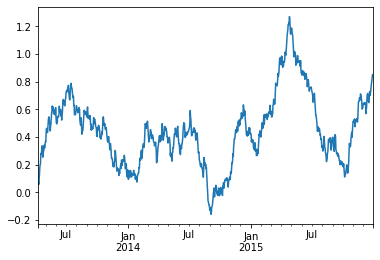

In [187]:
rolling.plot(); # 之後會有專門的章節介紹

---

In [188]:
rolling

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
                ...   
2015-12-27    0.811402
2015-12-28    0.835961
2015-12-29    0.850998
2015-12-30    0.842293
2015-12-31    0.848419
Freq: D, Length: 996, dtype: float64

In [189]:
# 注意現在的索引標籤是 datetime 資料型態
group_key = lambda x: x.year
groups = rolling.groupby(group_key) # 別忘了 .groupby() 方法也可帶入函式，會作用在每個索引標籤上
print_groups(groups)

2013
2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64
2014
2014-01-01    0.117808
2014-01-02    0.094268
2014-01-03    0.095311
2014-01-04    0.109263
2014-01-05    0.154128
Freq: D, dtype: float64
2015
2015-01-01    0.422732
2015-01-02    0.419439
2015-01-03    0.365094
2015-01-04    0.383965
2015-01-05    0.363668
Freq: D, dtype: float64


In [190]:
groups.agg([np.mean, np.std])

,mean,std
2013,0.454233,0.171988
2014,0.286502,0.182040
2015,0.599447,0.275786


---

In [191]:
print_groups(rolling.groupby(group_key))

2013
2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64
2014
2014-01-01    0.117808
2014-01-02    0.094268
2014-01-03    0.095311
2014-01-04    0.109263
2014-01-05    0.154128
Freq: D, dtype: float64
2015
2015-01-01    0.422732
2015-01-02    0.419439
2015-01-03    0.365094
2015-01-04    0.383965
2015-01-05    0.363668
Freq: D, dtype: float64


In [192]:
zscore = lambda x: (x - x.mean())/x.std()
normed = rolling.groupby(group_key).transform(zscore)
normed

2013-04-10   -2.213125
2013-04-11   -2.307837
2013-04-12   -2.122115
2013-04-13   -1.866325
2013-04-14   -1.618471
                ...   
2015-12-27    0.768548
2015-12-28    0.857598
2015-12-29    0.912124
2015-12-30    0.880561
2015-12-31    0.902772
Freq: D, Length: 996, dtype: float64

In [193]:
normed.groupby(group_key).agg([np.mean, np.std])

,mean,std
2013,2.237141e-16,1.0
2014,-2.223488e-16,1.0
2015,3.205959e-16,1.0


---

In [194]:
compared = pd.DataFrame({'Original': rolling,
                         'Normed': normed})
compared

,Original,Normed
2013-04-10,0.073603,-2.213125
2013-04-11,0.057313,-2.307837
2013-04-12,0.089255,-2.122115
2013-04-13,0.133248,-1.866325
2013-04-14,0.175876,-1.618471
...,...,...
2015-12-27,0.811402,0.768548
2015-12-28,0.835961,0.857598
2015-12-29,0.850998,0.912124
2015-12-30,0.842293,0.880561


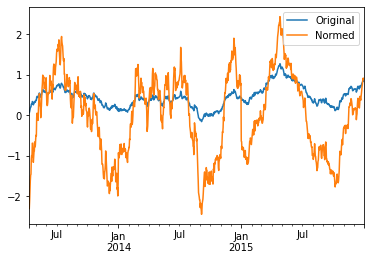

In [195]:
# 標準化完的資料再視覺化，更容易理解也更有利於分析
compared.plot();

## 過濾分組資料

In [196]:
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


In [197]:
print_groups(df.groupby('Label'))

A
  Label  Values
0     A     1.0
1     A     2.0
B
  Label  Values
2     B     3.0
C
  Label  Values
3     C     4.0
4     C     NaN
5     C     8.0


In [198]:
# GroupBy 物件的 .filter() 方法裡面放函式，函式返回的是布林值
# 把分完組的資料框或序列，一個一個帶入函式，True 的留下來，False 的會被過濾掉，再返回原始資料
f = lambda x: x.Values.count() > 1 # 序列的 .count() 方法沒算遺失值
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
3,C,4.0
4,C,NaN
5,C,8.0


In [199]:
# 只要組裡有遺失值，整組就被刪了!
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0


---

In [200]:
df

,Label,Values
0,A,1.0
1,A,2.0
2,B,3.0
3,C,4.0
4,C,NaN
5,C,8.0


In [201]:
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A     1.0
1     A     2.0
B
  Label  Values
2     B     3.0
C
  Label  Values
3     C     4.0
4     C     NaN
5     C     8.0


In [202]:
grouped.mean()

,Values
Label,
A,1.5
B,3.0
C,6.0


In [203]:
# 先算出每組的平均，再取平均
group_mean = grouped.mean().mean()
group_mean

Values    3.5
dtype: float64

In [204]:
# 比組的平均差距高過 2 留下，其他全組過濾掉!
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

,Label,Values
3,C,4.0
4,C,NaN
5,C,8.0


## 綜合應用

### 依分組指定填充遺失值

In [205]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    1.197946
2         NaN
3   -0.423806
4         NaN
5   -0.786641
dtype: float64

In [206]:
# 就序列而言，把遺失值填入平均值還蠻常見
s.fillna(s.mean())

0   -0.004167
1    1.197946
2   -0.004167
3   -0.423806
4   -0.004167
5   -0.786641
dtype: float64

---

In [207]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index = states)
data

Ohio         -0.393609
New York     -0.171092
Vermont       1.786173
Florida      -0.575189
Oregon        0.820750
Nevada       -1.256530
California   -0.642246
Idaho         0.236892
dtype: float64

In [208]:
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [209]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -0.393609
New York     -0.171092
Vermont            NaN
Florida      -0.575189
Oregon        0.820750
Nevada             NaN
California   -0.642246
Idaho              NaN
dtype: float64

In [210]:
print_groups(data.groupby(group_key))

East
Ohio       -0.393609
New York   -0.171092
Vermont          NaN
Florida    -0.575189
dtype: float64
West
Oregon        0.820750
Nevada             NaN
California   -0.642246
Idaho              NaN
dtype: float64


In [211]:
data.groupby(group_key).mean()

East   -0.379964
West    0.089252
dtype: float64

In [212]:
# 這題用 .transform() 方法會得到一樣的結果
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.393609
New York     -0.171092
Vermont      -0.379964
Florida      -0.575189
Oregon        0.820750
Nevada        0.089252
California   -0.642246
Idaho         0.089252
dtype: float64

---

In [213]:
print_groups(data.groupby(group_key))

East
Ohio       -0.393609
New York   -0.171092
Vermont          NaN
Florida    -0.575189
dtype: float64
West
Oregon        0.820750
Nevada             NaN
California   -0.642246
Idaho              NaN
dtype: float64


In [214]:
# 這題用 .transform() 方法會得到一樣的結果
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -0.393609
New York     -0.171092
Vermont       0.500000
Florida      -0.575189
Oregon        0.820750
Nevada       -1.000000
California   -0.642246
Idaho        -1.000000
dtype: float64

### 隨機取樣和排列

In [215]:
# 紅心 (Heart)、黑桃 (Spade)、梅花 (club)、方塊 (Diamond)
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10]*3)*4
base_names = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K']
suits

['H', 'S', 'C', 'D']

In [216]:
card_val

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 10,
 10,
 10]

In [217]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']

In [218]:
# 用 list comprehensive 來顯示紅心的牌
[str(num) + 'H' for num in base_names]

['AH', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', 'JH', 'QH', 'KH']

In [219]:
# 真正來製作一副撲克牌
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend([str(num) + suit for num in base_names])
    
deck = pd.Series(card_val, index = cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
QS     10
KS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
QC     10
KC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
QD     10
KD     10
dtype: int64

In [220]:
# 自定義函數來看看要取出幾張牌
def draw(deck, n = 5):
    return deck.sample(n)

draw(deck)

QC     10
10C    10
8S      8
9D      9
5D      5
dtype: int64

In [221]:
# 從每種花色隨機抽兩張牌
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw, n = 2)

C  8C     8
   3C     3
D  QD    10
   2D     2
H  3H     3
   9H     9
S  5S     5
   6S     6
dtype: int64

In [222]:
# 當然也可以把匿名函數寫在裡面
deck.groupby(get_suit).apply(lambda x: x.sample(2))

C  9C      9
   10C    10
D  3D      3
   7D      7
H  10H    10
   4H      4
S  7S      7
   KS     10
dtype: int64

In [223]:
deck.groupby(get_suit, group_keys = False).apply(draw, n = 2)

9C      9
2C      2
10D    10
9D      9
8H      8
AH      1
7S      7
AS      1
dtype: int64

### 加權平均和關聯性

In [224]:
df = pd.DataFrame(np.array([[1, 2], [3, 4], [5, 4]]),
                  columns = ['data', 'weights'])
df

,data,weights
0,1,2
1,3,4
2,5,4


注意加權平均是要自己乘上【權重/權重相加】<br/>
這題會是 $$1\times\frac{2}{10}+3\times\frac{4}{10}+5\times\frac{4}{10} = 3.4$$

In [225]:
# 可調用 np.average() 函式幫我們處理
np.average(df.data, weights = df.weights)

3.4

---

In [226]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-0.466867,0.454634
1,a,0.228547,0.770939
2,a,0.648593,0.266701
3,a,0.348631,0.788497
4,b,-0.627905,0.968516
5,b,-0.769042,0.062020
6,b,0.874707,0.146748
7,b,1.231456,0.034706


In [227]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights = g['weights'])
grouped.apply(get_wavg)

category
a    0.180560
b   -0.399946
dtype: float64

---

In [228]:
close_px = pd.read_csv('./mod08/stock_px_2.csv', 
                       parse_dates = True,
                       index_col = 0)
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [229]:
# 資料框的 .info() 方法可以簡略看出資料框的資訊
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [230]:
close_px[:5]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [231]:
# 計算每個欄位的變化百分比
rets = close_px.pct_change()
rets

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [232]:
# 去除遺失值
rets = rets.dropna()
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [233]:
get_year = lambda x: x.year
by_year  = rets.groupby(get_year)
print_groups(by_year)

2003
                AAPL      MSFT       XOM       SPX
2003-01-03  0.006757  0.001421  0.000684 -0.000484
2003-01-06  0.000000  0.017975  0.024624  0.022474
2003-01-07 -0.002685  0.019052 -0.033712 -0.006545
2003-01-08 -0.020188 -0.028272 -0.004145 -0.014086
2003-01-09  0.008242  0.029094  0.021159  0.019386
2004
                AAPL      MSFT       XOM       SPX
2004-01-02 -0.004677  0.002765 -0.008929 -0.003094
2004-01-05  0.042293  0.025276  0.023249  0.012395
2004-01-06 -0.003607  0.003586 -0.006816  0.001292
2004-01-07  0.022624 -0.001340 -0.007149  0.002367
2004-01-08  0.033628 -0.001342 -0.002592  0.004963
2005
                AAPL      MSFT       XOM       SPX
2005-01-03 -0.017081  0.000845 -0.022717 -0.008119
2005-01-04  0.010111  0.003797 -0.006904 -0.011671
2005-01-05  0.008758 -0.002522 -0.005098 -0.003628
2005-01-06  0.000930 -0.000843  0.012579  0.003506
2005-01-07  0.072491 -0.002952 -0.006441 -0.001431
2006
                AAPL      MSFT       XOM       SPX
2006-01-03 

In [234]:
# 分完組後，去看每個股票跟 SPX 的相關係數
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [235]:
# 分完組後，去看 APPLE 股價跟 MSFT 股價的相關係數
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

---

In [236]:
import statsmodels.api as sm

def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [237]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


### 樞紐關係表和交叉表

In [238]:
tips = pd.read_csv('./mod08/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [239]:
# 跟 .pivot() 方法類似，要給出 values、index、columns
# pivot_table 預設的聚合型態是計算分組的平均值
tips.pivot_table(index = ['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [240]:
tips.pivot_table(values = ['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [241]:
# 注意 margins 參數的效果
tips.pivot_table(values = ['tip_pct', 'size'], index = ['time', 'day'], columns = 'smoker', margins = True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [242]:
# 跟上面比對一下
tips['size'].mean()

2.569672131147541

In [243]:
# 跟上上面比對一下
tips.groupby('smoker')[['size', 'tip_pct']].mean()

,size,tip_pct
smoker,,
No,2.668874,0.159328
Yes,2.408602,0.163196


---

In [244]:
# 第一個位置參數就是 values
tips.pivot_table('tip_pct', index = ['time', 'smoker'], 
                  columns = 'day',
                  aggfunc= len,
                  margins = True)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

In [245]:
# 跟上上面比對一下
grp = tips.groupby(['time', 'smoker', 'day'])['tip_pct']
print_groups(grp)

('Dinner', 'No', 'Fri')
91    0.155625
94    0.142857
99    0.120385
Name: tip_pct, dtype: float64
('Dinner', 'No', 'Sat')
19    0.162228
20    0.227679
21    0.135535
22    0.141408
23    0.192288
Name: tip_pct, dtype: float64
('Dinner', 'No', 'Sun')
0    0.059447
1    0.160542
2    0.166587
3    0.139780
4    0.146808
Name: tip_pct, dtype: float64
('Dinner', 'No', 'Thur')
243    0.159744
Name: tip_pct, dtype: float64
('Dinner', 'Yes', 'Fri')
90    0.103555
92    0.173913
93    0.263480
95    0.117750
96    0.146628
Name: tip_pct, dtype: float64
('Dinner', 'Yes', 'Sat')
56    0.078927
58    0.156584
60    0.158206
61    0.144823
62    0.179673
Name: tip_pct, dtype: float64
('Dinner', 'Yes', 'Sun')
164    0.171331
172    0.710345
173    0.099843
174    0.237812
175    0.094529
Name: tip_pct, dtype: float64
('Lunch', 'No', 'Fri')
223    0.187735
Name: tip_pct, dtype: float64
('Lunch', 'No', 'Thur')
77    0.147059
78    0.131810
79    0.156738
81    0.204082
82    0.181728
Name: tip_pct,

---

In [246]:
tips.pivot_table('tip_pct', index = ['time', 'size', 'smoker'],
                 columns = 'day', aggfunc = 'mean')

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No           NaN  0.137931       NaN       NaN
            Yes          NaN  0.325733       NaN       NaN
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893       NaN
       3    No           NaN  0.154661  0.152663       NaN
            Yes          NaN  0.144995  0.152660       NaN
       4    No           NaN  0.150096  0.148143       NaN
            Yes     0.117750  0.124515  0.193370       NaN
       5    No           NaN       NaN  0.206928       NaN
            Yes          NaN  0.106572  0.065660       NaN
       6    No           NaN       NaN  0.103799       NaN
Lunch  1    No           NaN       NaN       NaN  0.181728
            Yes     0.223776       NaN       NaN       NaN
       2    No           NaN       NaN       NaN  0.166005
            Yes     0.181969       NaN       NaN  0.158843
       3    No      0.187735       NaN       NaN  0.084246
            Yes          NaN       NaN       NaN  0.204952
       4    No           NaN       NaN       NaN  0.138919
            Yes          NaN       NaN       NaN  0.155410
       5    No           NaN       NaN       NaN  0.121389
       6    No           NaN       NaN       NaN  0.173706

In [247]:
tips.pivot_table('tip_pct', index = ['time', 'size', 'smoker'],
                 columns = 'day', aggfunc = 'mean', fill_value = 0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

---

In [248]:
from io import StringIO

data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep = '\s+')

In [249]:
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [250]:
# 交叉表是一種樞紐分析表的特殊例子，專用來計算分組的頻率
# pd.crosstab 是全域函式，所以參數沒辦法帶入像 'Nationality' 之類的字串
# 只帶入 index 與 columns 參數，會幫你算每組的個數
pd.crosstab(index = data.Nationality, columns = data.Handedness, margins = True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [251]:
data.pivot_table('Sample', index = 'Nationality', columns = 'Handedness', margins= True, aggfunc = 'count')

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [252]:
grp = data.groupby(['Nationality', 'Handedness'])
print_groups(grp)

('Japan', 'Left-handed')
   Sample Nationality   Handedness
1       2       Japan  Left-handed
4       5       Japan  Left-handed
('Japan', 'Right-handed')
   Sample Nationality    Handedness
3       4       Japan  Right-handed
5       6       Japan  Right-handed
8       9       Japan  Right-handed
('USA', 'Left-handed')
   Sample Nationality   Handedness
7       8         USA  Left-handed
('USA', 'Right-handed')
   Sample Nationality    Handedness
0       1         USA  Right-handed
2       3         USA  Right-handed
6       7         USA  Right-handed
9      10         USA  Right-handed


In [253]:
grp.count()

Sample
Nationality Handedness          
Japan       Left-handed        2
            Right-handed       3
USA         Left-handed        1
            Right-handed       4

---

In [254]:
pd.crosstab(index = [tips.time, tips.day], columns = tips.smoker, margins = True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

---

In [255]:
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""

In [256]:
lst = data.split('\n')

In [257]:
lst

['Sample  Nationality  Handedness',
 '1   USA  Right-handed',
 '2   Japan    Left-handed',
 '3   USA  Right-handed',
 '4   Japan    Right-handed',
 '5   Japan    Left-handed',
 '6   Japan    Right-handed',
 '7   USA  Right-handed',
 '8   USA  Left-handed',
 '9   Japan    Right-handed',
 '10  USA  Right-handed']

In [258]:
pd.Series(lst)

0     Sample  Nationality  Handedness
1               1   USA  Right-handed
2            2   Japan    Left-handed
3               3   USA  Right-handed
4           4   Japan    Right-handed
5            5   Japan    Left-handed
6           6   Japan    Right-handed
7               7   USA  Right-handed
8                8   USA  Left-handed
9           9   Japan    Right-handed
10              10  USA  Right-handed
dtype: object

In [259]:
# 因為裡面有很多空白，所以要用 '\s+'
s = pd.Series(lst).str.split('\s+')
s

0     [Sample, Nationality, Handedness]
1                [1, USA, Right-handed]
2               [2, Japan, Left-handed]
3                [3, USA, Right-handed]
4              [4, Japan, Right-handed]
5               [5, Japan, Left-handed]
6              [6, Japan, Right-handed]
7                [7, USA, Right-handed]
8                 [8, USA, Left-handed]
9              [9, Japan, Right-handed]
10              [10, USA, Right-handed]
dtype: object

In [260]:
# 要先把資料框的框架建出來
my_df = pd.DataFrame(np.zeros((len(s) - 1, 3)), columns = s[0])
my_df

,Sample,Nationality,Handedness
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [261]:
for i, val in enumerate(s[1:]):
    my_df.iloc[i] = val

In [262]:
my_df

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed
